3 Вариант

У нас уравнение имеет вид:
$$y''(t) + 3y'(t) + 2y(t) = 3u'(t)+u(t)$$

Continuous A:
 [[-3. -2.]
 [ 1.  0.]]
Continuous B:
 [[1.]
 [0.]]
Continuous C:
 [[3. 1.]]
Continuous D:
 [[0.]]
Eigenvalues of A: [-2. -1.]

Discrete A:
 [[ 0.73262409 -0.17221333]
 [ 0.08610666  0.99094408]]
Discrete B:
 [[0.08610666]
 [0.00452796]]
Discrete C:
 [[3. 1.]]
Discrete D:
 [[0.]]
Eigenvalues of Ad: [0.81873075 0.90483742]


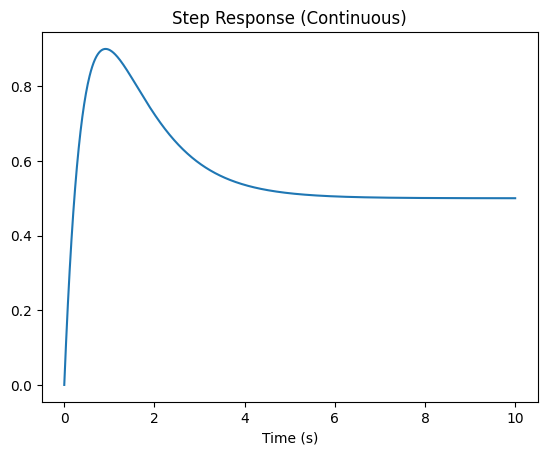

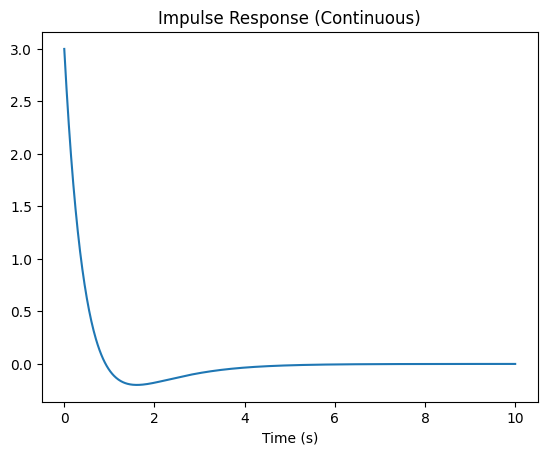

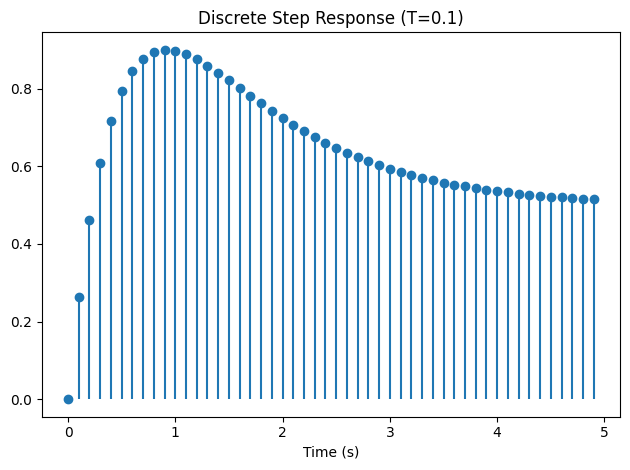

In [1]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Define continuous system
num = [3, 1]
den = [1, 3, 2]
G = signal.TransferFunction(num, den)
A, B, C, D = signal.tf2ss(num, den)

# Discretize with T=0.1
T = 0.1
sysd = signal.cont2discrete((A, B, C, D), T, method='zoh')
Ad, Bd, Cd, Dd, dt = sysd

# Print matrices
print("Continuous A:\n", A)
print("Continuous B:\n", B)
print("Continuous C:\n", C)
print("Continuous D:\n", D)
print("Eigenvalues of A:", np.linalg.eigvals(A))
print("\nDiscrete A:\n", Ad)
print("Discrete B:\n", Bd)
print("Discrete C:\n", Cd)
print("Discrete D:\n", Dd)
print("Eigenvalues of Ad:", np.linalg.eigvals(Ad))

# Responses
t = np.linspace(0, 10, 1000)
t_step, y_step = signal.step(G, T=t)
t_imp, y_imp = signal.impulse(G, T=t)

t_d = np.arange(0, 50) * T
t_step_d, y_step_d = signal.dstep((Ad, Bd, Cd, Dd, T), t=t_d)
y_step_d = np.squeeze(y_step_d)

# Plotting
plt.figure()
plt.plot(t_step, y_step)
plt.title("Step Response (Continuous)")
plt.xlabel("Time (s)")

plt.figure()
plt.plot(t_imp, y_imp)
plt.title("Impulse Response (Continuous)")
plt.xlabel("Time (s)")

plt.figure()
plt.stem(t_step_d, y_step_d, basefmt=" ")
plt.title("Discrete Step Response (T=0.1)")
plt.xlabel("Time (s)")

plt.tight_layout()
plt.show()
